In [1]:
import numpy as np
import sympy as smp
from sympy import assoc_laguerre as L

In [2]:
r, fi, x, y, z, w0, k, z0 = smp.symbols(' rho phi x y z omega_0 k z_0', real = True)
p, m = smp.symbols('p m', integer = True)
w, R = smp.symbols(' omega R', cls = smp.Function)
#smp.sqrt(x**2 + y**2)
#smp.atan2(y, x)
w = w(z)
R = R(z)

In [6]:
smp.pi

pi

In [7]:
E_x = smp.sqrt((2**(smp.Abs(m) + 1)*smp.factorial(p))/(smp.pi*smp.factorial(p + np.abs(m)))) * w0/w * (smp.sqrt(2)*r/w)**smp.Abs(m) * L(p, smp.Abs(m), 2*r**2 / w**2) * smp.exp(- r**2 / w**2) * \
smp.exp(smp.I*(k*z + (1 + smp.Abs(m) + 2*p)) * smp.atan2(z, z0)) * smp.exp(smp.I*m*fi) * smp.exp(smp.I * k * r**2 / (2*R))

E_x = E_x.subs([(w, w0*smp.sqrt(1 + (z/z0)**2)), (R, z*(1 + (z0/z)**2))])

E_y = 0

E_z = smp.I/k * (smp.diff(E_x, r)*smp.cos(fi) + smp.diff(E_x, fi)*(-smp.sin(fi)/r) + smp.diff(E_x, z)*smp.diff(z, x))


In [8]:
iw_B_x = smp.diff(E_z, r)*smp.sin(fi) + smp.cos(fi)/r * smp.diff(E_z, fi)

iw_B_y = smp.diff(E_x, z) - (smp.cos(fi)*smp.diff(E_z, r) - smp.sin(fi)/r*smp.diff(E_z, fi))

iw_B_z = -(smp.sin(fi)*smp.diff(E_x, r) + smp.cos(fi)/r*smp.diff(E_x, fi))

In [9]:
df_E_y = smp.diff(E_y, fi)
iw_df_B_x = smp.diff(iw_B_x, fi)
iw_df_B_y = smp.diff(iw_B_y, fi)
df_E_z = smp.diff(E_z, fi)

In [10]:
E_x_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], E_x)
E_y_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], E_y)
E_z_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], E_z)

iw_B_x_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], iw_B_x)
iw_B_y_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], iw_B_y)
iw_B_z_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], iw_B_z)

df_E_y_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], df_E_y)
iw_df_B_x_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], iw_df_B_x)
iw_df_B_y_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], iw_df_B_y)
df_E_z_f = smp.lambdify([p, m, z0, w0, k,  r, fi, z], df_E_z)

In [11]:
iw_df_B_x_f(1, 2, 1, 1, 1, 2, 3, 4)

(0.03614913063556727-0.04800059737271505j)

In [12]:
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [13]:
#p, m = (1, 1)
c = 13.7 # v0 (zece viteze atomice) ------- viteza luminii in vid
la = 0.75 #micrometru----------lungimea de unda pt rosu
w_0 = 2*la #micrometru --------- largimea fasciculului
k = 2*np.pi/la # 1/micrometru------ modulul vectorului de unda in directia z
w = c * k # v0/micrometru---------frecventa undei monocromatice
z_0 = np.pi*w_0**2 / la #micrometru-------distanta_Rayleigh

In [22]:
z_0

9.42477796076938

In [15]:
k

8.377580409572781

In [16]:
spin_integrand = lambda p, m, r, fi, z: np.real((-1j)*r*(E_x_f(p, m, z_0, w_0, k, r, fi, z)*np.conjugate(iw_B_x_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w)) + \
                                   E_y_f(p, m, z_0, w_0, k, r, fi, z)*np.conjugate(iw_B_y_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w))))

orbit_integrand = lambda p, m, r, fi, z: np.real((-1j)*r*(-np.conjugate(iw_B_x_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w))*df_E_y_f(p, m, z_0, w_0, k, r, fi, z) + \
                                           E_y_f(p, m, z_0, w_0, k, r, fi, z)*np.conjugate(iw_df_B_x_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w)) - \
                                           E_x_f(p, m, z_0, w_0, k, r, fi, z)*np.conjugate(iw_df_B_y_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w)) + \
                                            np.conjugate(iw_B_y_f(p, m, z_0, w_0, k, r, fi, z)/(1j*w))*df_E_z_f(p, m, z_0, w_0, k, r, fi, z)))

In [17]:
Mzzspin = lambda p, m, raza, z: 1/(2*k) * dblquad(lambda fi, r: spin_integrand(p, m, r, fi, z), 0, raza, 0, 2*np.pi)[0]
Mzzorbit = lambda p, m, raza, z: 1/(4*k) * dblquad(lambda fi, r: orbit_integrand(p, m, r, fi, z), 0, raza, 0, 2*np.pi)[0] #Fortran library QUADPACK.

In [18]:
Mzzspin = np.vectorize(Mzzspin)
Mzzorbit = np.vectorize(Mzzorbit)

In [23]:
#Heavy computational work

z = np.linspace(0.01, 30, 21)
Morbit_20_z = Mzzorbit(2, 0, 2*w_0, z) #aria suprafetei constanta (raza=const.)
Morbit_21_z = Mzzorbit(2, 1, 2*w_0, z)
Morbit_22_z = Mzzorbit(2, 2, 2*w_0, z)
Morbit_23_z = Mzzorbit(2, 3, 2*w_0, z)


In [16]:
(Morbit_22_z - Morbit_23_z)**2

array([0.01332864, 0.04084966, 0.08132912, 0.13211797, 0.19027734,
       0.25151285, 0.30829414, 0.34980198, 0.36593484, 0.35354457,
       0.31936147, 0.27642155, 0.23720165, 0.20904311, 0.19380421,
       0.18974139, 0.19331078, 0.2002774 , 0.20651853, 0.20876265,
       0.20512131])

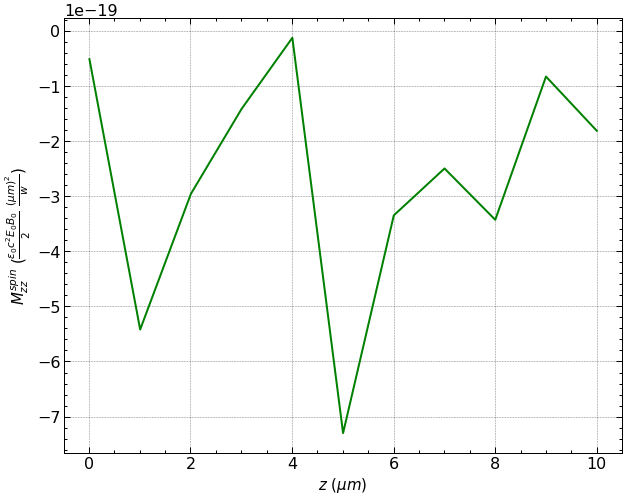

In [80]:
#don't run this cell!!

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

z = np.linspace(0.01, 10, 11)
Mspin = Mzzspin(z)

ax.plot(z, Mspin, 'g')

ax.set_xlabel('$z \ (\mu m)$', fontsize = 15)
ax.set_ylabel(r'$M_{zz}^{spin} \ (\frac{\epsilon_0 c^2 E_0 B_0}{2} \ \frac{(\mu m)^2}{w}$)', fontsize = 15)

#plt.savefig('LG_Ec.png', dpi=200)
plt.show()

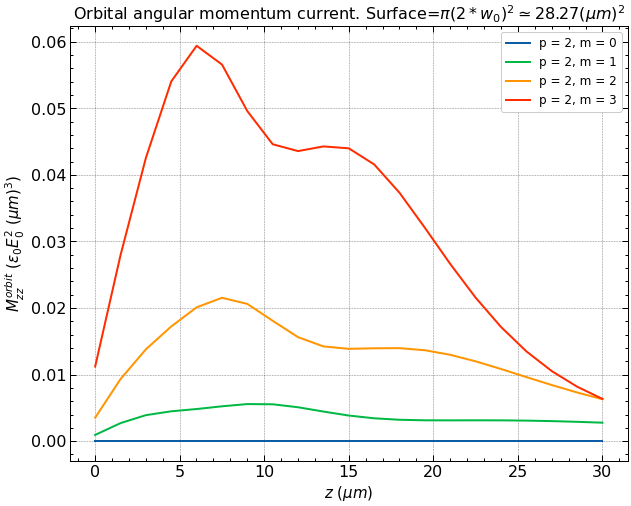

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.plot(z, Morbit_20_z, label='p = 2, m = 0')
ax.plot(z, Morbit_21_z, label='p = 2, m = 1')
ax.plot(z, Morbit_22_z, label='p = 2, m = 2')
ax.plot(z, Morbit_23_z, label='p = 2, m = 3')

ax.set_xlabel('$z \ (\mu m)$', fontsize = 15)
ax.set_ylabel(r'$M_{zz}^{orbit} \ (\epsilon_0 E_0^2 \ (\mu m)^3$)', fontsize = 15)

ax.set_title(r'Orbital angular momentum current. Surface=$ \pi (2*w_0)^2 \simeq 28.27 (\mu m)^2$')
ax.legend(loc='upper right', fontsize=12)

plt.savefig('M_orbit_z_3.png', dpi=200)
plt.show()

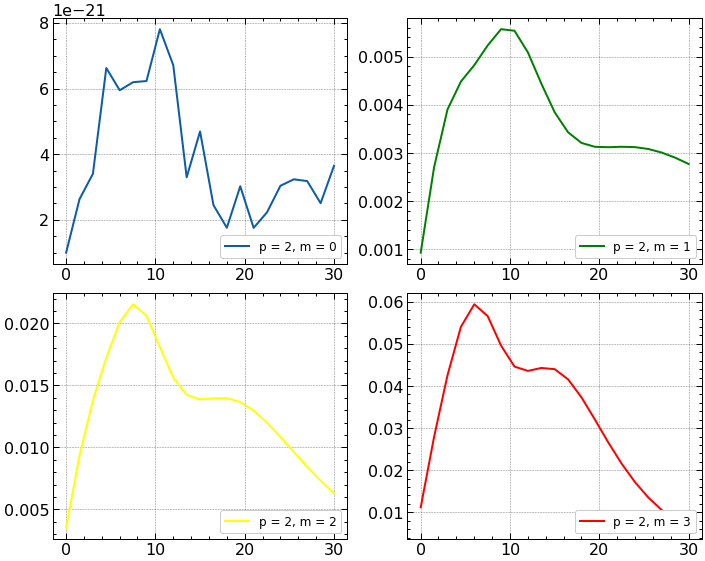

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

ax = axes[0][0]
ax.plot(z, Morbit_20_z, label='p = 2, m = 0')
ax.legend(loc='lower right', fontsize=12)

ax = axes[0][1]
ax.plot(z, Morbit_21_z, color='green', label='p = 2, m = 1')
ax.legend(loc='lower right', fontsize=12)

ax = axes[1][0]
ax.plot(z, Morbit_22_z,color='yellow', label='p = 2, m = 2')
ax.legend(loc='lower right', fontsize=12)

ax = axes[1][1]
ax.plot(z, Morbit_23_z,color='red', label='p = 2, m = 3')
ax.legend(loc='lower right', fontsize=12)


plt.tight_layout()
plt.savefig('M_orbit_z_separate.png', dpi=200)
plt.show()

In [27]:
#Heavy computational work

Ss = np.linspace(np.pi*(0.1*w_0)**2, np.pi*(5*w_0)**2, 11) #z = const, Surfaces vary
Morbit_21_S = Mzzorbit(2, 1, Ss, 20.)
Morbit_22_S = Mzzorbit(2, 2, Ss, 20.)

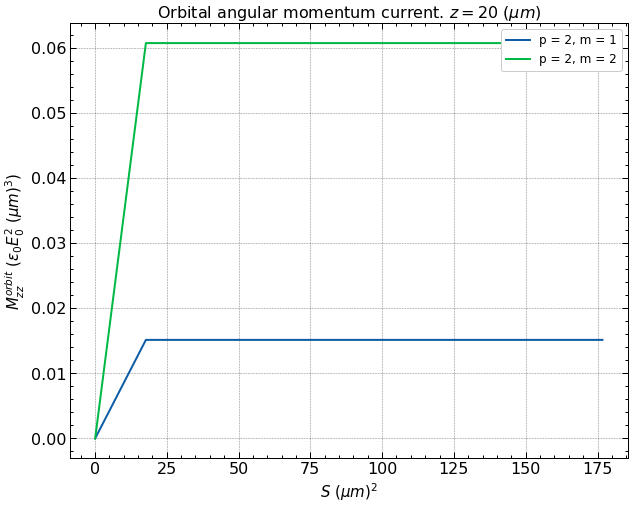

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.plot(Ss, Morbit_21_S, label='p = 2, m = 1')
ax.plot(Ss, Morbit_22_S, label='p = 2, m = 2')

ax.set_xlabel('$S \ (\mu m)^2$', fontsize = 15)
ax.set_ylabel(r'$M_{zz}^{orbit} \ (\epsilon_0 E_0^2 \ (\mu m)^3$)', fontsize = 15)

ax.set_title(r'Orbital angular momentum current. $z = 20 \ (\mu m)$')
ax.legend(loc='upper right', fontsize=12)

plt.savefig('M_orbit_S.png', dpi=200)
plt.show()